HPLC ANALSIS OF COMPOUNDS

Set:
    filename to .csv with data structure:
            'mouse_no' 'group_no' 'compound_region'
                1           2           ng_mg
    treatment_mapping: 
    compound_ratio_mapping: dictionary of the ratios of interest 
    experimental_info: 
    

QUANTITATIVE ANALYSIS
    aggrogate stats
    histograms comparing mean +/- SEM

QUALITATIVE ANALYSIS
    correlograms
    PCA

Imports and Constants:

In [1]:
from main import *  # Must be reimported when changes made to module file

%load_ext autoreload 
%autoreload 2

# TO DO : This dhould be applied to the big df from the get go to not have to do it every time ? REMI i dont get it 
treatment_mapping = (
    {  # TO DO : change name to treatment_info and add columns in df REMI
        1: {"treatment": "vehicles",
            "color": "white",
            "experiments": ["dose_response", "agonist_antagonist"],
            },
        2: {"treatment": "10mg/kgTCB",
            "color": "firebrick",
            "experiments": ["dose_response"],
            },
        3: {"treatment": "3mg/kgTCB",
            "color": "red",
            "experiments": ["dose_response", "agonist_antagonist"],
            },
        4: {"treatment": "0.3mg/kgTCB",
            "color": "salmon",
            "experiments": ["dose_response"],
            },
        5: {"treatment": "0.2mg/kgMDL",
            "color": "black",
            "experiments": ["agonist_antagonist"],
            },
        6: {"treatment": "TCB+MDL",
            "color": "grey",
            "experiments": ["agonist_antagonist"],
            },
    }
)
compound_ratio_mapping = {
    "DOPAC": ["DA"],
    "5HIAA": ["5HT"],
    "3MT": ["DA"],
    "HVA": ["DA", "3MT", "DOPAC"],
    "GLN": ["GLU"],
}

#JJB: possible outlier tests  = ['grubbs',] chose one set it and its a constant 



#JJB added:
region_subclassification = {
    'cortex': {'regions': ['OF', 'PL', 'CC', 'IC', 'M', 'SL1', 'SR1', 'AC', 'V'], 'color': 'mediumblue'},
    'subcortical_telencephalon': {'regions': ['Am', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL'], 'color': 'orange'},
    'diencephalon': {'regions': ['MD', 'VPL', 'VPR', 'DG', 'Y'], 'color': 'darkorchid'},
    'mesencephalon': {'regions': ['SC', 'SN', 'VTA', 'DR', 'MR'], 'color': 'forestgreen'},
    'cerebellum': {'regions': ['CE'], 'color': 'peru'}}


filename = "TCB2_data_HPLC.csv"  # TCB2 #using current working directory plus file name
HT_filename = "TCB2_data_HT.csv"


#JJB : this is how I believe it should be, your code relies on quantitative_statistics and correlation_statistics this should be removed
# experimental_info = {
#     "dose_response": {"groups": [1, 2, 3, 4], 
#                       "independant_vars": ["TCB2"], 
#                       "paired": True,
#                       "parametric": True, #idealy this would be True / False / Check : check would involve checking the data using the spearman test which should already be done then taking the majority of the data to be parametric or not chose that 
#                       "outliers": ['grubbs']
#                       },
#     "agonist_antagonist": {"groups": [1,3,5,6,],  # JASMINETODO: the order here will be the one used by histogram and correlogram
#                          "independant_vars": ["TCB2","MDL"],
#                          "paired": True,
#                          "parametric": True,
#                          "outliers": ["grubbs"]
#                            },
# }

#REMI OLD CODE: delete when stats logic is intergrated!
experimental_info = {
    "dose_response": {"groups": [1, 2, 3, 4], "independant_vars": ["TCB2"]},
    "agonist_antagonist": {
        "groups": [
            1,
            3,
            5,
            6,
        ],  # JASMINETODO: the order here will be the one used by histogram and correlogram
        "independant_vars": [
            "TCB2",
            "MDL",
        ],
        "outliers": ["grubbs"],
        "correlation_statistics": ["pearson"],
        "quantitative_statistics": {
            "twoway_anova": True,
            "oneway_anova": True,
            "tukey": True,
        },
    },
}


saveMetadata(
    filename, treatment_mapping=treatment_mapping, experimental_info=experimental_info
)

#this is hacky as fuck but for now as all files are from same experiment so need access to info
saveMetadata(
    HT_filename, treatment_mapping=treatment_mapping, experimental_info=experimental_info
)

TREATMENT MAPPING {1: {'treatment': 'vehicles', 'color': 'white', 'experiments': ['dose_response', 'agonist_antagonist']}, 2: {'treatment': '10mg/kgTCB', 'color': 'firebrick', 'experiments': ['dose_response']}, 3: {'treatment': '3mg/kgTCB', 'color': 'red', 'experiments': ['dose_response', 'agonist_antagonist']}, 4: {'treatment': '0.3mg/kgTCB', 'color': 'salmon', 'experiments': ['dose_response']}, 5: {'treatment': '0.2mg/kgMDL', 'color': 'black', 'experiments': ['agonist_antagonist']}, 6: {'treatment': 'TCB+MDL', 'color': 'grey', 'experiments': ['agonist_antagonist']}} SAVED TO /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC SUBCACHE
EXPERIMENTAL INFO {'dose_response': {'groups': [1, 2, 3, 4], 'independant_vars': ['TCB2']}, 'agonist_antagonist': {'groups': [1, 3, 5, 6], 'independant_vars': ['TCB2', 'MDL'], 'outliers': ['grubbs'], 'correlation_statistics': ['pearson'], 'quantitative_statistics': {'twoway_anova': True, 'oneway_anova': True, 'tukey': True}}} SAVED TO /Users/jas

In [ ]:
#I STILL THINK IT WOULD BE NICE TO HAVE a way to do all thew outliers together 
#as when you load a new dataset that is what you may need to donot just case by case
#there is also less vaiaabliity if you sit once for all nt flavored by mood 

#THIS CELL WOULD BE STEP ONE WHICH IS OUTLIERS



In [4]:
#QUANTITATIVE HISTOGRAMS

#JJB REMI discuss how i fixed the order because you func buildHistogramData() looks like it should generate the same thing i.e. the order of groups_id acending,  but its different 
#also I think the ordering should be done in experimental info when you input the data the order you input the 'groups' is the ordre they will be plotted 
#REMI BUG FIX: FileNotFoundError: [Errno 2] No such file or directory: '/Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/agonist_antagonist_for_5HIAA/5HT_in_AC.pkl'

quantitativeHistogram( 
    filename,
    p_value_threshold=0.05,
)

# quantitativeHistogram( #REMI this still forces prompts - not fun
#     filename,
#     experiment='agonist_antagonist',
#     compound='5HIAA/5HT',
#     region='AC',
#     outlier_test= 'grubbs', #this should not be asked every time it is something you would set once in the constants for this experiment, could do redo_outliers = T/F
#     #it forced me to do outliers as ther were not done 5HIAA/5HT in DL dont love this 
#     p_value_threshold=0.05, #again this should be a constant for the experiment 
#     from_scratch=True,
# )

# subselectDf(getCompoundAndRatiosDf(filename), {'compound':'5HIAA/5HT', 'region':'OF', 'experiment':'agonist_antagonist'})


('TCB2_data_HT.csv',
 'headtwitch_df',
 <function module.getters.buildHeadtwitchDf(filename)>)

RETRIEVED "compound_and_ratios_df" FROM "TCB2_data_HPLC" CACHE
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/agonist_antagonist_compound_DA-GLU_OF,PL,CC,IC,M,SJ,SL1,SL6,SR6,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE.pkl
SAVED /Users/jasminebutler/Desktop/phd/output/correlogram/agonist_antagonist_compound_DA-GLU_OF,PL,CC,IC,M,SJ,SL1,SL6,SR6,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE.svg
SAVED /Users/jasminebutler/Desktop/phd/output/correlogram/agonist_antagonist_compound_DA-GLU_OF,PL,CC,IC,M,SJ,SL1,SL6,SR6,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE.png


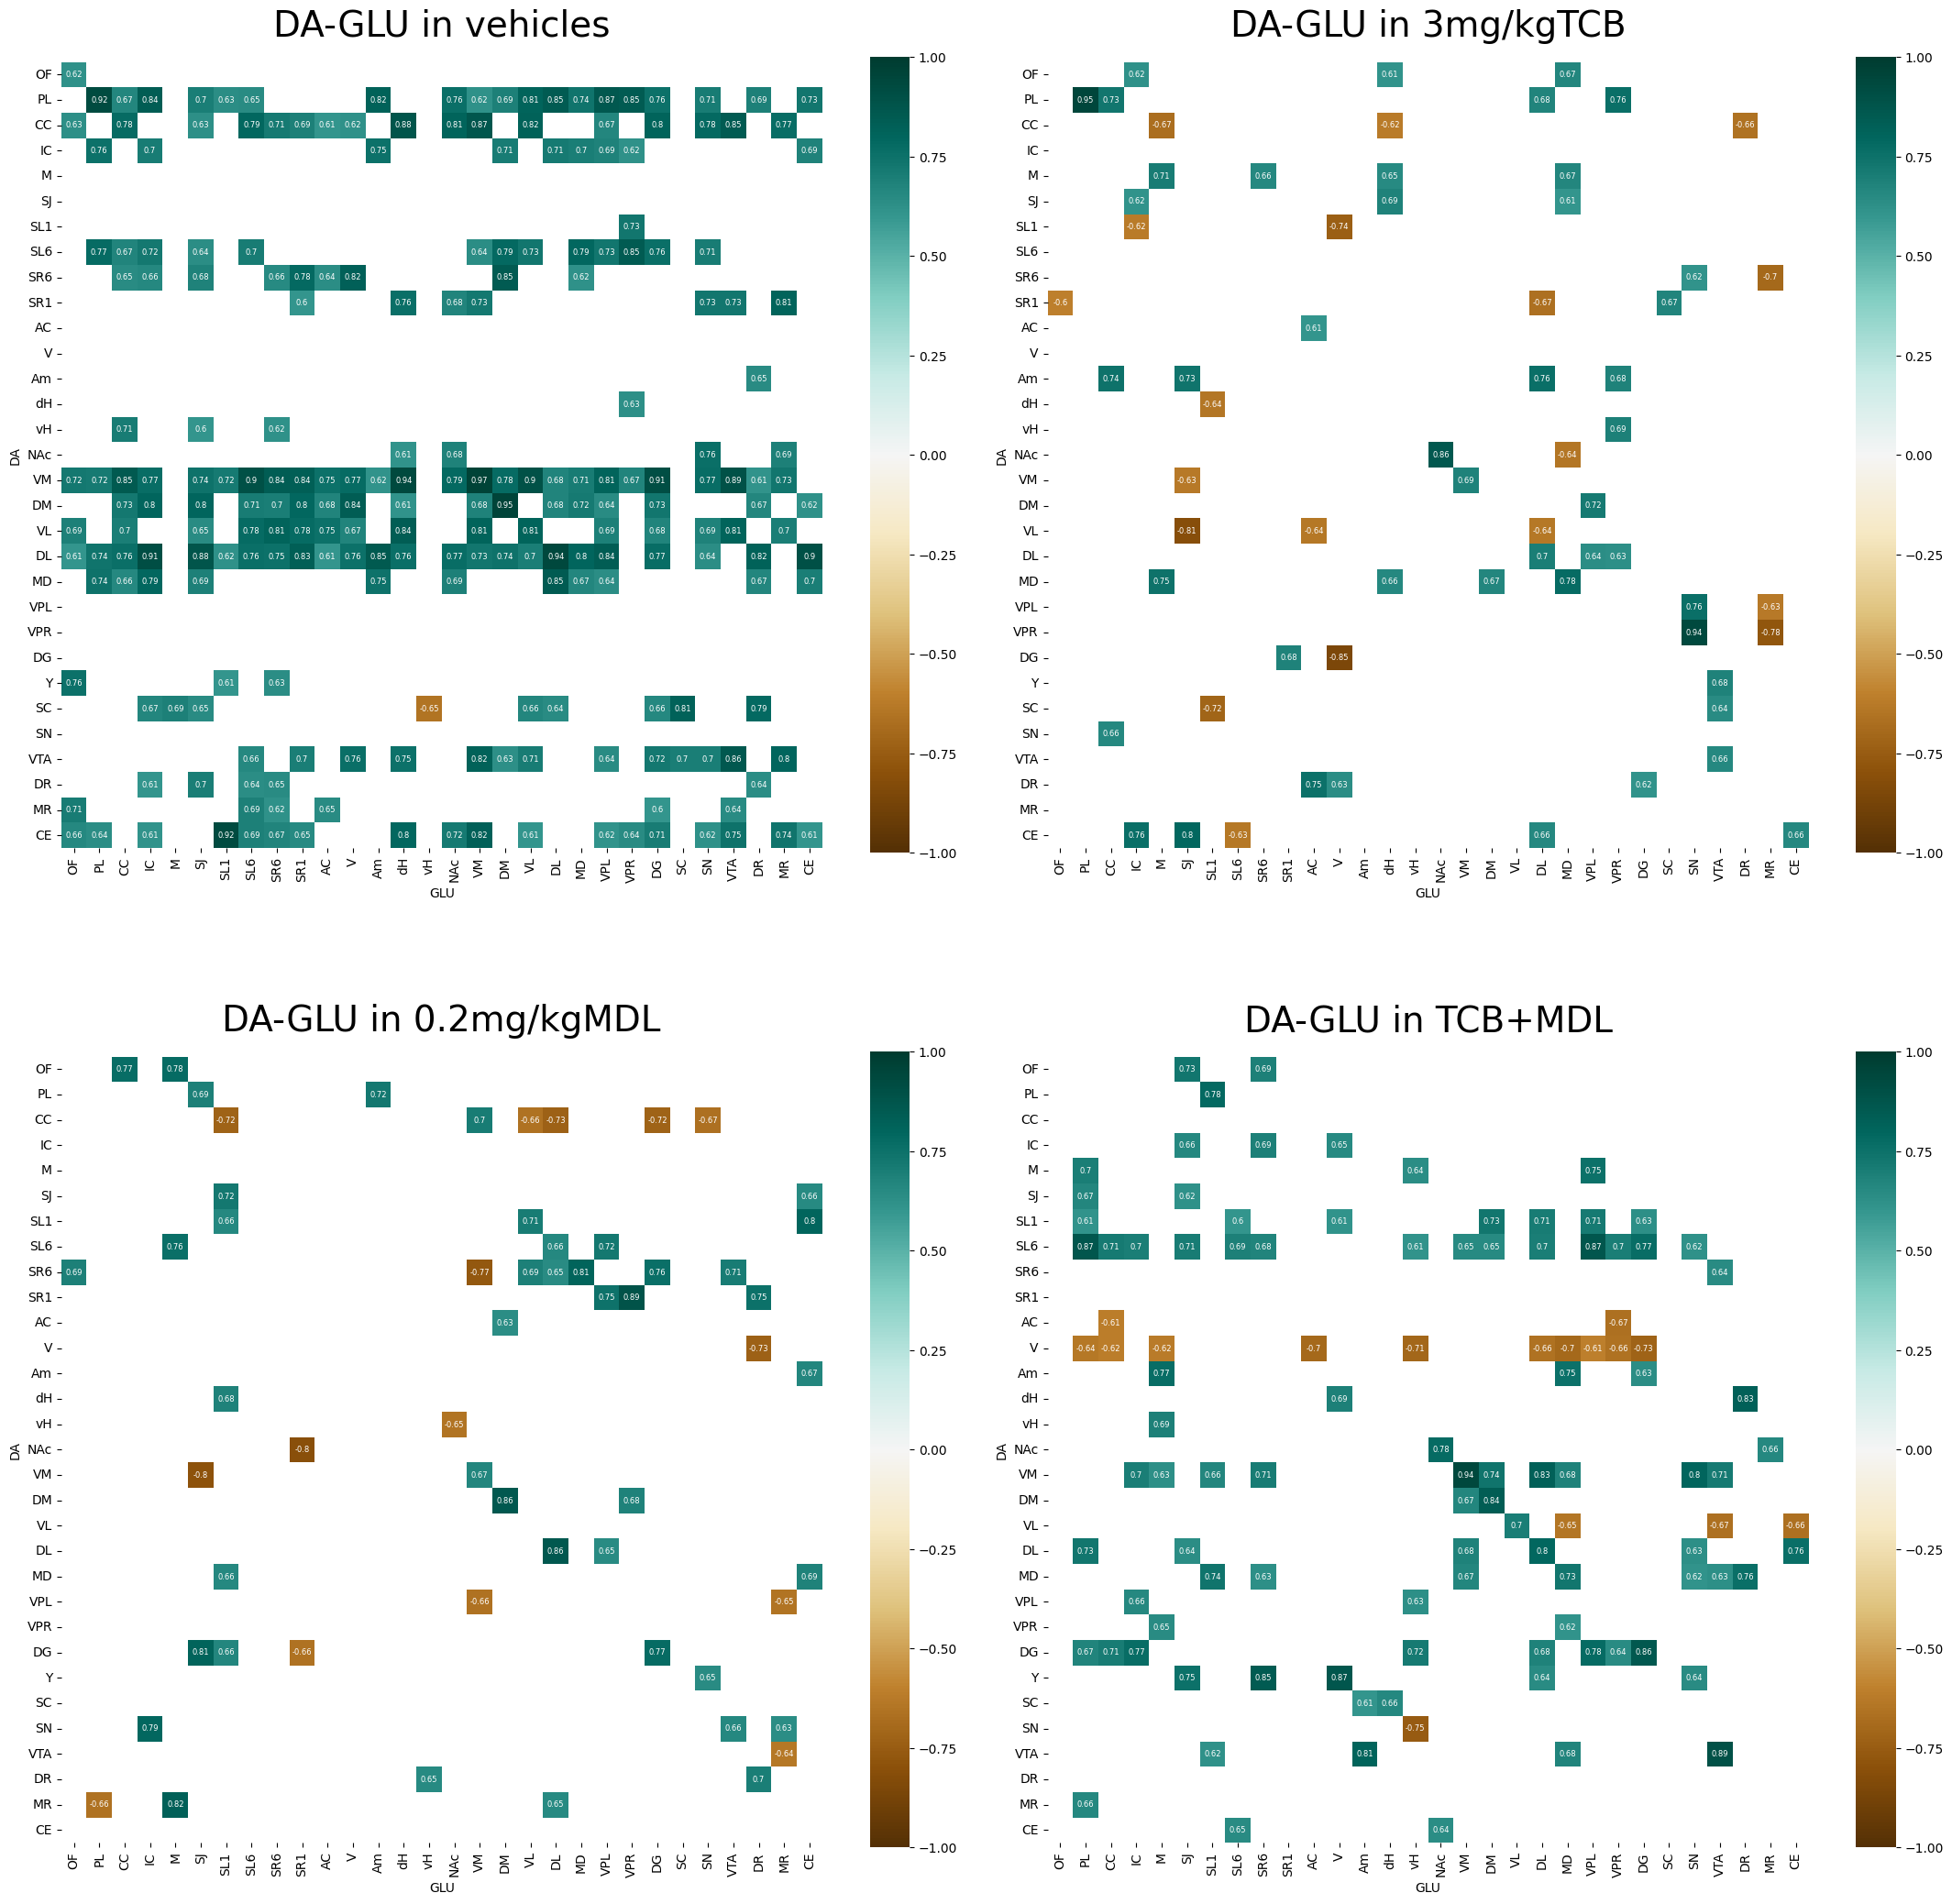

In [2]:
#CORRELOGRAMS

correlogram(filename, p_value_threshold=0.05) #with prompts

correlogram(filename, 
            experiment='agonist_antagonist', 
            correlogram_type='compound',
            to_correlate='DA-5HT', 
            p_value_threshold=0.05, 
            n_minimum=5, 
            columns=["OF","PL","CC", "IC","M", "SJ","SL1", "SL6", "SR6", "SR1", "AC", "V",  
                     "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                     "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"],
            from_scratch=True,
            )

RETRIEVED "headtwitch_df" FROM "TCB2_data_HT" CACHE
RETRIEVED "headtwitch_df" FROM "TCB2_data_HT" CACHE
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HT/head_twitch_histogram_agonist_antagonist_for_HT_20.pkl
SAVED /Users/jasminebutler/Desktop/phd/output/head_twitch_histogram/head_twitch_histogram_agonist_antagonist_for_HT_20.svg
SAVED /Users/jasminebutler/Desktop/phd/output/head_twitch_histogram/head_twitch_histogram_agonist_antagonist_for_HT_20.png


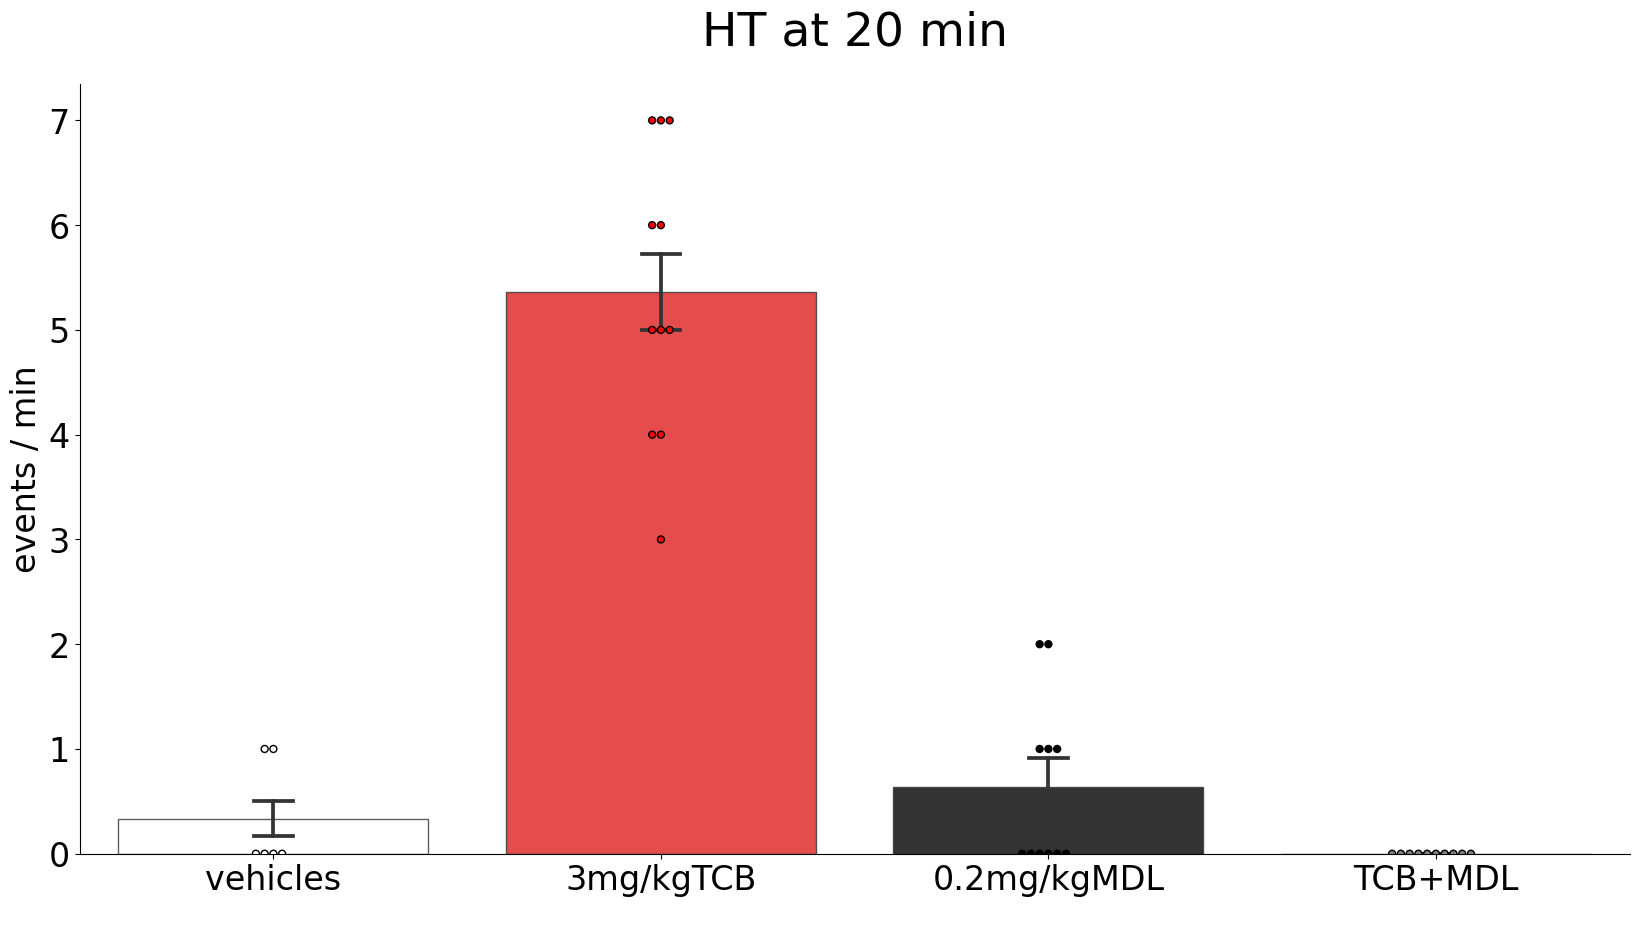

In [3]:
#BEHQVIOR (HT / ES) #REMI need to intergrate stats logic, outliers and prompts
headTwitchHistogram(
    HT_filename,
    experiment='agonist_antagonist',
    vairable='HT_20',
    outlier_test=None,
    p_value_threshold=0.05,
    from_scratch=True,
)

#subselectDf(getHeadTwitchDf(HT_filename), {"treatment": "10mg/kgTCB", "experiment": "dose_response"})

In [2]:
#SUBSELECT RAW DATA
data = getCompoundAndRatiosDf(filename)
subselectDf(data, {"treatment": "3mg/kgTCB", "experiment": "dose_response"})
#second pram is a dict of colname and subgroup to select


RETRIEVED "compound_and_ratios_df" FROM "TCB2_data_HPLC" CACHE


,mouse_id,group_id,value,compound,region,treatment,color,experiment,grubbs_outlier,eliminated_grubbs_outlier
11,16,3,166.850105,ASP,OF,3mg/kgTCB,red,dose_response,NaN,NaN
13,18,3,198.952480,ASP,OF,3mg/kgTCB,red,dose_response,NaN,NaN
14,19,3,103.904387,ASP,OF,3mg/kgTCB,red,dose_response,NaN,NaN
17,22,3,184.189661,ASP,OF,3mg/kgTCB,red,dose_response,NaN,NaN
22,27,3,93.515798,ASP,OF,3mg/kgTCB,red,dose_response,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1197436,55,3,223.304592,5HT/DOPAC,Y,3mg/kgTCB,red,dose_response,NaN,NaN
1197437,55,3,6.924497,5HT/5HTP,Y,3mg/kgTCB,red,dose_response,NaN,NaN
1197438,55,3,2.225795,5HT/DA,Y,3mg/kgTCB,red,dose_response,NaN,NaN
1197439,55,3,1.955491,5HT/5HIAA,Y,3mg/kgTCB,red,dose_response,NaN,NaN


In [3]:
#GET AGGERGATED STATS DF
subselectDf(getAggregateStatsDf(filename), {"treatment": "10mg/kgTCB", "experiment": "dose_response"})
#second pram is a dict of colname and subgroup to select


RETRIEVED "compound_and_ratios_df_aggregate_stats" FROM "TCB2_data_HPLC" CACHE


,treatment,region,compound,experiment,shapiro_F,shapiro_p,is_valid,mean,std,sem,values
27868,10mg/kgTCB,AC,5HIAA,dose_response,0.948802,0.628688,True,0.061213,0.017420,0.005252,"[0.08560137, 0.053223793, 0.049058342, 0.02844..."
27869,10mg/kgTCB,AC,5HIAA/5HT,dose_response,0.984413,0.985714,True,0.432047,0.085798,0.025869,"[0.4687343760560557, 0.42240950001580946, 0.35..."
27870,10mg/kgTCB,AC,5HIAA/5HTP,dose_response,0.687213,0.000321,True,10.980239,13.005499,3.921305,"[2.831817541240991, 4.945500969470258, 4.28915..."
27871,10mg/kgTCB,AC,5HIAA/A,dose_response,0.741892,0.001630,True,106.286189,140.887185,42.479085,"[433.24697212788675, 241.02140599385942, 89.10..."
27872,10mg/kgTCB,AC,5HIAA/ALA,dose_response,0.900112,0.185434,True,0.001761,0.000419,0.000126,"[0.0018212453502475417, 0.0015957668563622504,..."
...,...,...,...,...,...,...,...,...,...,...,...
41797,10mg/kgTCB,vH,TYR/HVA,dose_response,NaN,1.000000,True,107.189108,140.212220,44.338997,"[283.1047605366569, 0.0, 0.0, 0.0, 0.0, 0.0, n..."
41798,10mg/kgTCB,vH,TYR/LSER,dose_response,0.772418,0.004083,True,0.084346,0.102888,0.031022,"[0.23636591002983406, 0.0, 0.0, 0.0, 0.0, 0.0,..."
41799,10mg/kgTCB,vH,TYR/NA,dose_response,0.782937,0.005611,True,14.438259,17.614757,5.311049,"[47.39925284857632, 0.0, 0.0, 0.0, 0.0, 0.0, 2..."
41800,10mg/kgTCB,vH,TYR/TAU,dose_response,0.767298,0.003499,True,0.008388,0.010507,0.003168,"[0.02597720632187491, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
#Quantitative Summary Fig

In [ ]:
#PCA

In [ ]:
#GRAPH THEORY 